## データ

訓練データセットに含まれるカラムを以下に示します。(テストデータセットにはwinPlacePercカラムは含まれません。)

| カラム名 | 説明 |
| - | - |
| Id | プレイヤーのID |
| groupId | チームのID |
| matchId | 対戦のID |
| assists | プレイヤーがアシストしてチームで倒した敵の人数 |
| boosts | ブーストアイテムを使用した回数 |
| damageDealt | 受けたダメージ(ただし自爆を除く) |
| DBNOs | 攻撃した敵の人数 |
| headshotKills | ヘッドショットで倒した敵の人数 |
| heals | 回復アイテムを使用した回数 |
| killPlace | その対戦において倒した敵の人数に関する順位 |
| killPoints | (killに関する)イロレーティング |
| kills | 倒した敵の人数 |
| killStreaks | 短時間に倒した敵の人数の最大値 |
| longestKill | 倒したプレイヤーと倒されたプレイヤーの距離の最大値 |
| matchDuration | 対戦時間 |
| matchType | 対戦モード |
| numGroups | チーム数 |
| rankPoints | イロレーティング |
| revives | チームメイトを復活させた回数 |
| rideDistance | 車で移動した距離の合計 |
| roadKills | 車に乗っている間に倒した敵の人数 |
| swimDistance | 泳いで移動した距離の合計 |
| teamKills | チームメイトを倒した回数 |
| vehicleDestroys | 車が破壊された数 |
| walkDistance | 歩いて移動した距離 |
| weaponsAcquired | ひろった武器の数 |
| winPoints | (winに関する)イロレーティング |
| winPlacePerc | 順位の割合(1: 1位, 0: 最下位) |

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
 # 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
path = "../input/"

df = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')

In [6]:
df.head(15)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2860d3f9ee4d4b,46f1b1c3bf0dae,25ade93a241f39,0,0,0.00,0,0,0,80,0,0,0,0.000,1413,duo,48,48,1496,0,0.00,0,0.0,0,0,257.00,4,0,0.167487
1,0b88c47e54cdcc,5e92598b08bcb1,95125f5e05c653,0,2,359.00,4,0,0,5,1387,4,2,35.700,1386,duo-fpp,48,47,-1,1,262.70,0,0.0,0,0,1025.00,5,1607,0.610492
2,8f086d61515bc4,ed4cfbc560f490,8a84da96d077c3,0,0,223.50,1,0,0,15,1673,2,1,27.390,1410,duo-fpp,49,48,-1,0,0.00,0,0.0,0,0,712.80,2,1736,0.666206
3,7c037ca62a38a4,d2ff4830704e19,a139eac809980a,0,0,128.10,0,0,0,50,1479,0,0,0.000,1357,squad-fpp,31,28,-1,0,0.00,0,0.0,0,0,2738.00,4,1476,0.722956
4,82f08cde238c60,7c5002766d8c7a,e9d203a36b1d0a,0,0,200.00,2,0,0,36,0,1,1,25.750,1395,squad-fpp,28,28,1479,0,0.00,0,0.0,0,0,129.40,2,0,0.204095
5,554c888a6ff2ae,0a4b2a9fc11a88,d97e7815558ad6,0,0,0.00,0,0,0,71,1408,0,0,0.000,1453,solo-fpp,95,93,-1,0,0.00,0,0.0,0,0,91.61,1,1460,0.309028
6,14306c2b633c25,f6e3a6b887da96,97879fd93ce1ae,1,1,37.10,0,0,0,44,973,0,0,0.000,1342,duo,47,42,-1,0,1029.00,0,0.0,0,0,1938.00,3,1467,0.676406
7,5403c1dda96aae,1432c806cf026d,3fccffc751050d,0,0,0.00,0,0,0,84,999,0,0,0.000,1320,duo-fpp,48,46,-1,0,0.00,0,0.0,0,0,121.20,3,1495,0.120564
8,ba1aa87a8ac904,fb8a6b64bec9d5,d1e71efdebb366,2,4,160.00,0,0,12,26,0,1,1,17.340,1386,duo-fpp,49,48,1494,0,2580.00,0,71.5,0,0,3377.00,4,0,0.876983
9,1b44f69e581935,f39999a309bccf,fc1894fb00cab4,0,0,100.00,1,0,0,31,0,1,1,3.844,1358,duo-fpp,46,45,1495,0,0.00,0,0.0,0,0,25.72,2,0,0.108697


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 29 columns):
Id                 7134 non-null object
groupId            7134 non-null object
matchId            7134 non-null object
assists            7134 non-null int64
boosts             7134 non-null int64
damageDealt        7134 non-null float64
DBNOs              7134 non-null int64
headshotKills      7134 non-null int64
heals              7134 non-null int64
killPlace          7134 non-null int64
killPoints         7134 non-null int64
kills              7134 non-null int64
killStreaks        7134 non-null int64
longestKill        7134 non-null float64
matchDuration      7134 non-null int64
matchType          7134 non-null object
maxPlace           7134 non-null int64
numGroups          7134 non-null int64
rankPoints         7134 non-null int64
revives            7134 non-null int64
rideDistance       7134 non-null float64
roadKills          7134 non-null int64
swimDistance       7134 n

In [8]:
print('訓練データのデータ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は7134、変数は29種類です。
テストデータのデータ数は1794、変数は28種類です


In [9]:
df.isnull().sum() 

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [10]:
df_test.isnull().sum() 

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

### 前処理が必要な説明変数
- Id
- groupId
- matchId
- matchType

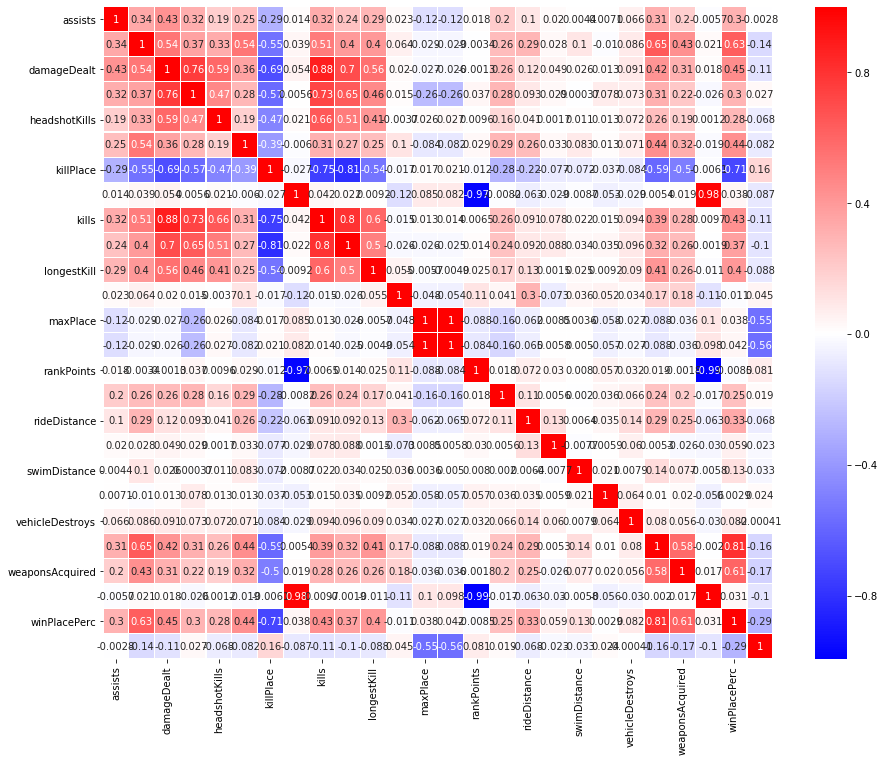

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='bwr',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.show()

In [19]:
df.nunique()

Id                 7134
groupId            3239
matchId              76
assists               7
boosts               12
damageDealt        3209
DBNOs                12
headshotKills         8
heals                22
killPlace           100
killPoints          722
kills                15
killStreaks           7
longestKill        2727
matchDuration        68
matchType             7
maxPlace             16
numGroups            25
rankPoints          460
revives               6
rideDistance       1635
roadKills             5
swimDistance        427
teamKills             3
vehicleDestroys       3
walkDistance       5303
weaponsAcquired      19
winPoints           333
winPlacePerc       6801
TeamSize             16
dtype: int64

### groupID⇨何人の人が所属しているチームか？

In [14]:
group_count = df.groupby("groupId", as_index=False)["Id"].count().rename(columns={"Id": "TeamSize"})

In [10]:
group_count.describe()

,Id
count,3239.000000
mean,2.202532
std,1.425431
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,16.000000


In [17]:
df = pd.merge(df, group_count, on="groupId", how="left")

In [13]:
group_count.groupby("Id", as_index=False)["groupId"].count()

,Id,groupId
0,1,1113
1,2,1256
2,3,365
3,4,339
4,5,82
5,6,35
6,7,14
7,8,12
8,9,9
9,10,6


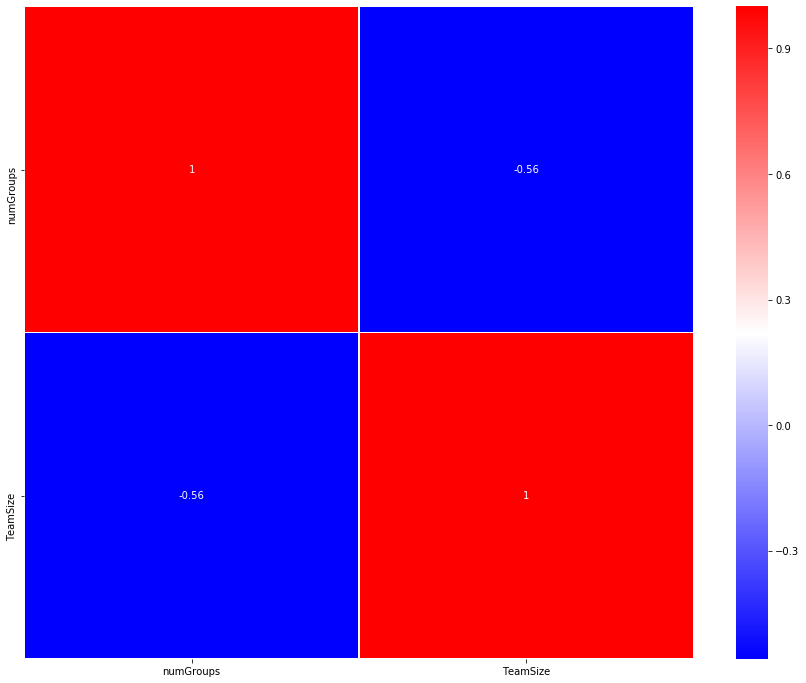

In [22]:
sns.heatmap(df[["numGroups", "TeamSize"]].corr(),annot=True,cmap='bwr',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.show()

In [24]:
group_roadKills = df.groupby("roadKills", as_index=False)["Id"].count()

In [25]:
group_roadKills

,roadKills,Id
0,0,7099
1,1,27
2,2,5
3,3,1
4,4,2


In [28]:
group_weaponsAcquired = df.groupby("weaponsAcquired", as_index=False)["Id"].count()

In [29]:
group_weaponsAcquired

,weaponsAcquired,Id
0,0,388
1,1,1004
2,2,1214
3,3,1236
4,4,1099
5,5,830
6,6,588
7,7,365
8,8,212
9,9,99


In [32]:
df[df["weaponsAcquired"] == 0]["winPlacePerc"].describe()

count    388.000000
mean       0.093683
std        0.162583
min        0.000000
25%        0.000000
50%        0.030738
75%        0.109410
max        0.938639
Name: winPlacePerc, dtype: float64

In [33]:
df["winPlacePerc"].describe()

count    7134.000000
mean        0.447767
std         0.289620
min         0.000000
25%         0.191378
50%         0.434249
75%         0.702232
max         1.000000
Name: winPlacePerc, dtype: float64

In [49]:
group_walkDistance = df.groupby("walkDistance", as_index="False")["Id"].count()

In [54]:
group_walkDistance.head()

walkDistance
0.0000    154
0.0709      1
0.1542      1
0.2800      4
0.2916      1
Name: Id, dtype: int64

In [72]:
df["walkDistance"].describe()

count    7134.000000
mean     1153.440717
std      1197.548761
min         0.000000
25%       153.125000
50%       663.000000
75%      1974.000000
max      8628.000000
Name: walkDistance, dtype: float64

In [77]:
df["BaseWalkDistance"] = pd.cut(df["walkDistance"], [0, 200, 500, 1000, 2000, 3000, 5000, 10000])

In [78]:
df.groupby("BaseWalkDistance", as_index="False")["Id"].count()

BaseWalkDistance
(0, 200]         1932
(200, 500]       1167
(500, 1000]       837
(1000, 2000]     1296
(2000, 3000]     1089
(3000, 5000]      632
(5000, 10000]      27
Name: Id, dtype: int64

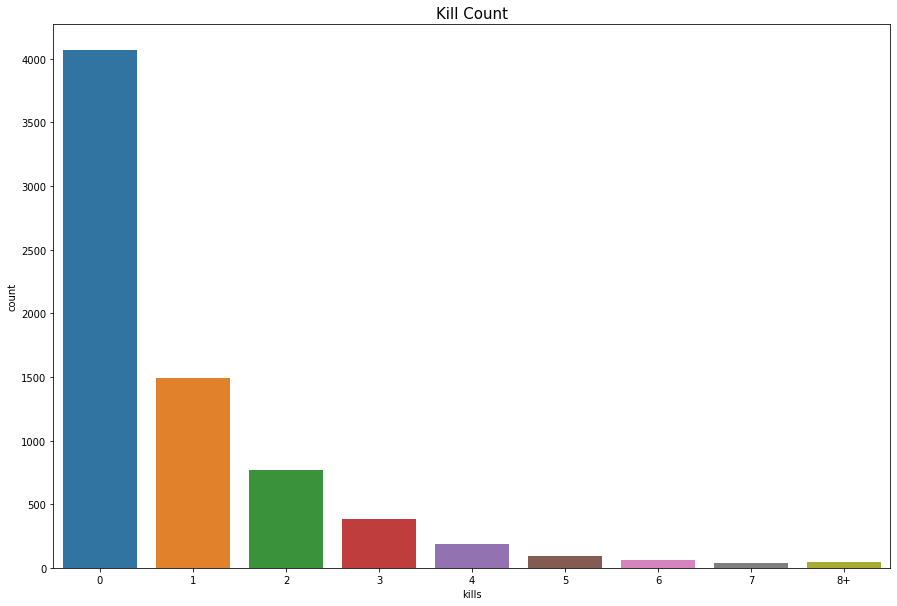

In [99]:
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99), 'kills'] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

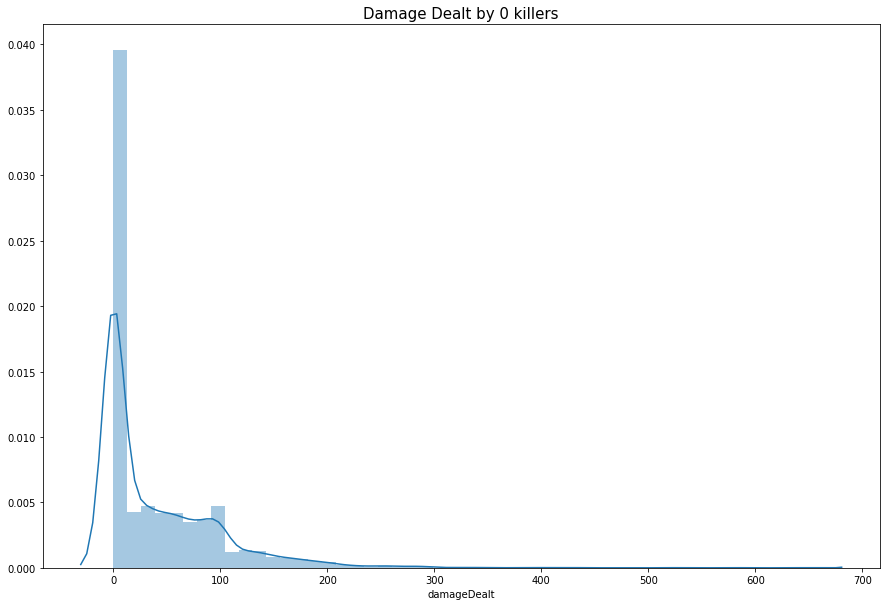

In [101]:
data = df.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

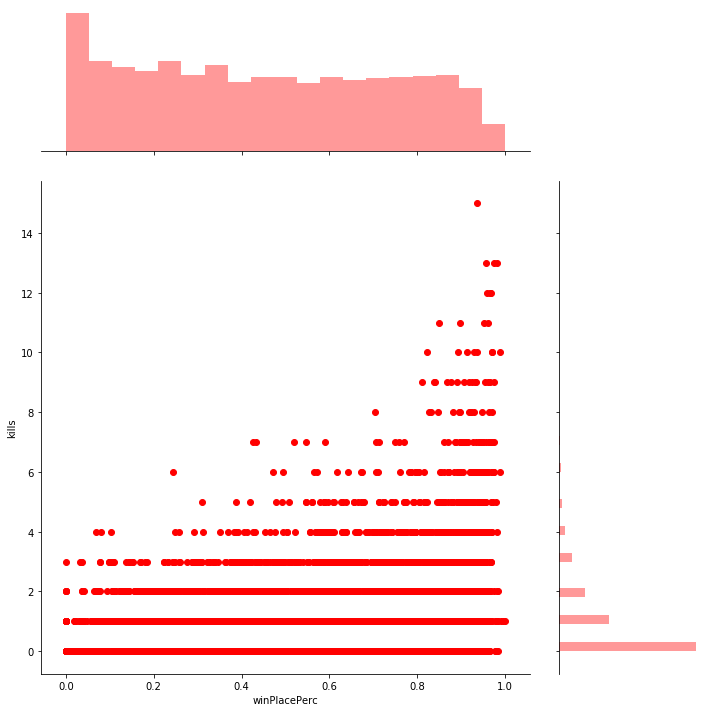

In [103]:
sns.jointplot(x="winPlacePerc", y="kills", data=df, height=10, ratio=3, color="r")
plt.show()

In [4]:
df.groupby("matchId")["Id"].count()

matchId
00e0abcf6a7d35     93
04028905be0cf6     93
0957ae2c5ad457     98
0cbdfa444c89bd     96
0ebbefe1bdb2ff     91
0efcb3d587de94     95
16648ea8e66401     98
1a19db2a5bd8ba     93
1eacfda087d5d5     86
1f9c1058fe19ce     95
214ba5e6940983     95
25ade93a241f39     96
2ed2125029f02a     99
32fb800e86ea89     95
34091ec0a17ad7     95
39ffe4bba081ba     97
3fccffc751050d     95
4316f15123d787     97
462206d2352a67     91
4f94bb11535d03     96
5161bc3fef53a2     96
55c4c016afe3a2     93
57ca154b527f49    100
5e1b2d03222865     94
61500d7d18d469     98
61888e12b331c3     98
67e2464e16b5b9     97
6f6e52b15ddf21     93
70f9a656aba1ac     97
74f618f1c50a87     87
                 ... 
aa99a400039689     97
ad64f6d48b9105     90
b4204f1c8eb362     88
b71ba7a2729b75     99
bd7dff6c9fd319     96
c3450aab34ab59     82
c6a1c9bc246658     93
c98f840e9704d9     96
cb7546a9e1e602     92
cd52197ef7c804     98
cde69bf8b6472f     97
cf8ab90dfdcf82     98
d1e71efdebb366     98
d3c9e75fb0cc70     87
d4